This notebook computes spatial clusters of observations with one attribute (e.g. the cyclostationary_mean_rr_4w observations in the Emiliani1 sub-basin), considering their correlations.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import cycle

os.chdir("../scripts")

In [2]:
from aux_NonLinCFA import prepare_features
from CorrelationClustering import *
from compute_neighbors import compute_neighbors

%load_ext autoreload
%autoreload 2

In [3]:
def plot_clusters(output, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []

    cmap = plt.get_cmap('rainbow')
    plt.figure(figsize=(10,6))
    #plt.title(col, fontsize = 12)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    # iterate over all the features aggregations
    for j in range (len(output)):       # j iterates all the clusters
        x = []
        y = []
        for datum in output[j]:
            x.append(float(datum.split('_')[1]))
            #print(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
            #print(float(datum.split('_')[2]))

        plt.scatter(x,y,s=200,color=cmap(1.*j/len(output))) # ax[i][0].scatter(x,y,color=colors[j])

In [34]:
colnames = ['cyclostationary_mean_tg',
        'cyclostationary_mean_tg_1w',
        'cyclostationary_mean_tg_4w',
        'cyclostationary_mean_tg_8w',
        'cyclostationary_mean_tg_12w',
        'cyclostationary_mean_tg_16w',
        'cyclostationary_mean_tg_24w',
        'cyclostationary_mean_rr',
        'cyclostationary_mean_rr_1w',
        'cyclostationary_mean_rr_4w',
        'cyclostationary_mean_rr_8w',
        'cyclostationary_mean_rr_12w',
        'cyclostationary_mean_rr_16w',
        'cyclostationary_mean_rr_24w']

col = colnames[9]
path = "Emiliani1_aggreg.csv"
df_train_unfolded_std,df_val_unfolded_std,df_test_unfolded_std,df_trainVal_unfolded_std = prepare_features(path,col,multiple=False,max_train='2013-11-22', 
                            max_val='2018-04-10', max_test='2022-12-31', cols_order = "bottom_left", no_winter = False, only_winter = False)

#clusters : 7


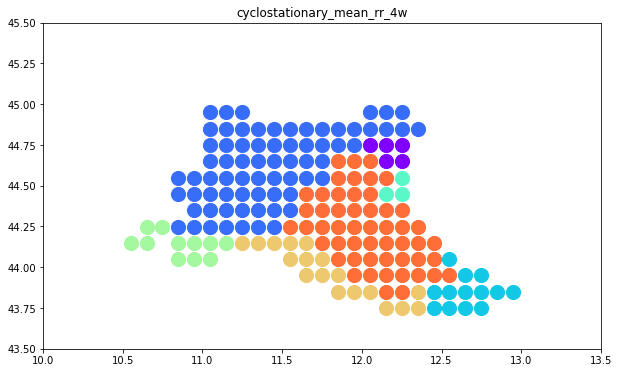

In [5]:
corr_threshold = 0.88
scale = 0.1
output = CorrelationClustering(df_train_unfolded_std, corr_threshold, scale).compute_clusters()
print("#clusters : " + str(len(output)))
plot_clusters(output, xmin=10, xmax=13.5, ymin=43.5, ymax=45.5)

Clustering FAPAN only considering August where there are more data avaliable, only considering the observations that are available every year

In [30]:
def plot_clusters(output, figsize=(16,10), s=1, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []

    cmap = plt.cm.colors.ListedColormap(np.random.rand(len(output), 3))
    markers = cycle(['o', 's', '^', 'v', 'D', 'p', 'h'])

    plt.figure(figsize=figsize)
    #plt.title(col, fontsize = 12)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    # iterate over all the features aggregations
    for j in range (len(output)):       # j iterates all the clusters
        x = []
        y = []
        for datum in output[j]:
            x.append(float(datum.split('_')[1]))
            #print(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
            #print(float(datum.split('_')[2]))
        marker = next(markers)
        plt.scatter(x,y,s=s,color=cmap(j), marker=marker) # ax[i][0].scatter(x,y,color=colors[j])

In [5]:
df = pd.read_csv("../data/FAPAN_august_no_nan.csv")
df = df.iloc[:,1:]
df = df.drop_duplicates() # There is one duplicate!

In [6]:
df = df[(df['x'] >= 5) & (df['x'] <= 20) & (df['y'] >= 35) & (df['y'] <= 50)]

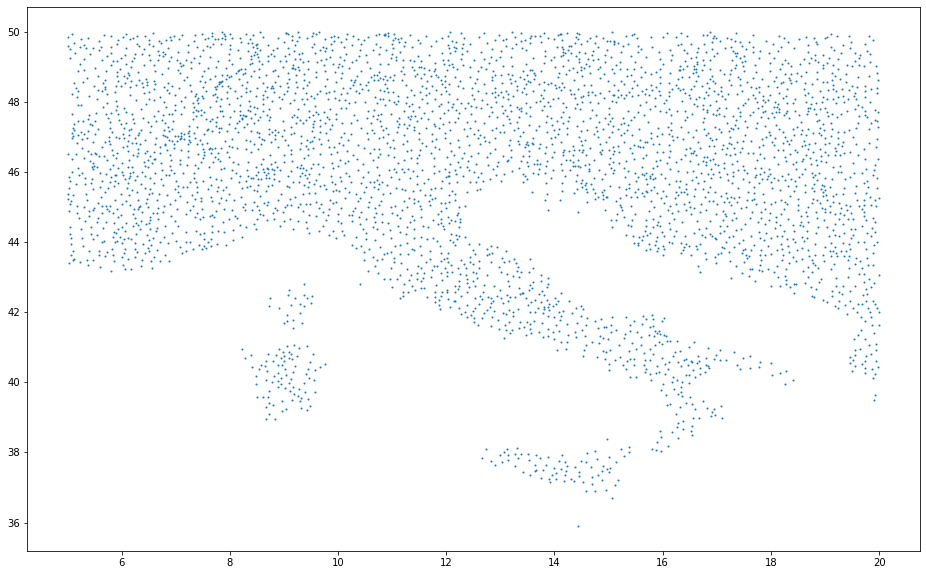

In [7]:
plt.figure(figsize=(16,10))
plt.scatter(df['x'], df['y'], s=1)

In [42]:
#df = df.iloc[:300, :]

In [8]:
transposed_df = df.T
transposed_df
# Create a new DataFrame with the transposed data and desired column names
new_df = pd.DataFrame(transposed_df.values, columns=['mean_' + str(transposed_df.iloc[0, i]) + '_' + str(transposed_df.iloc[1, i]) for i in range(len(transposed_df.columns))])

# Drop the first two rows (x and y)
new_df.drop([0, 1], inplace=True)
new_df.reset_index(drop=True, inplace=True)

In [9]:
neighbors_05 = compute_neighbors(new_df, scale=0.5)

Computing neighbors...


100%|██████████| 4089/4089 [00:22<00:00, 183.07it/s]

Neighbors computed


In [8]:
clusters_05_08 = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.8)
print(len(clusters_05_08))


Computing aggregations...


4322it [40:02,  1.80it/s]                            


Aggregations computed
156


NameError: name 'plot_clusters' is not defined

In [31]:
plot_clusters(clusters_05_08, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

NameError: name 'clusters_05_08' is not defined

Computing aggregations...


7377it [31:41,  3.88it/s]                            


Aggregations computed
722


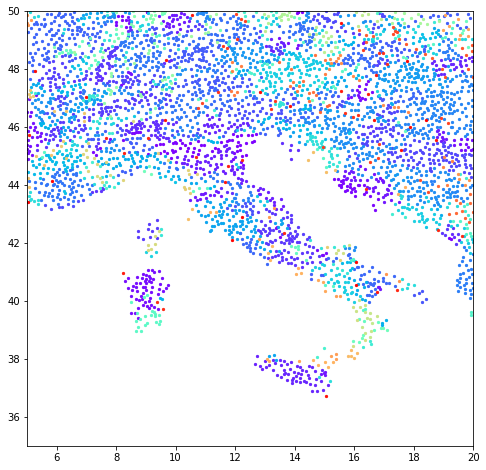

In [22]:
clusters_05_09 = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.9)
print(len(clusters_05_09))
plot_clusters(clusters_05_09, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


 82%|████████▏ | 3366/4089 [32:24<06:57,  1.73it/s]  


Aggregations computed
341


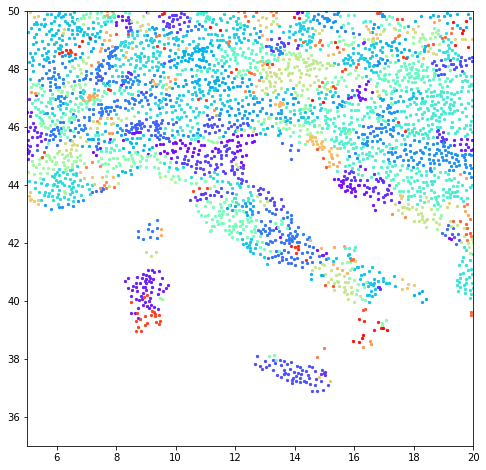

In [10]:
clusters_05_09n = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.9)
print(len(clusters_05_09n))
plot_clusters(clusters_05_09n, figsize=(8,8), s=5, xmin=5, xmax=20, ymin=35, ymax=50)

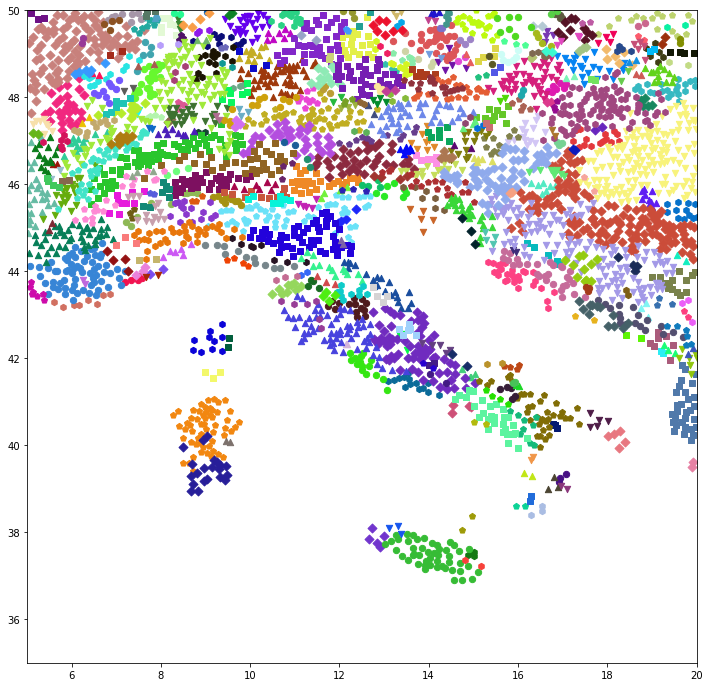

In [32]:
plot_clusters(clusters_05_09n, figsize=(12,12), s=40, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


 93%|█████████▎| 3783/4089 [31:46<02:34,  1.98it/s]  


Aggregations computed
154


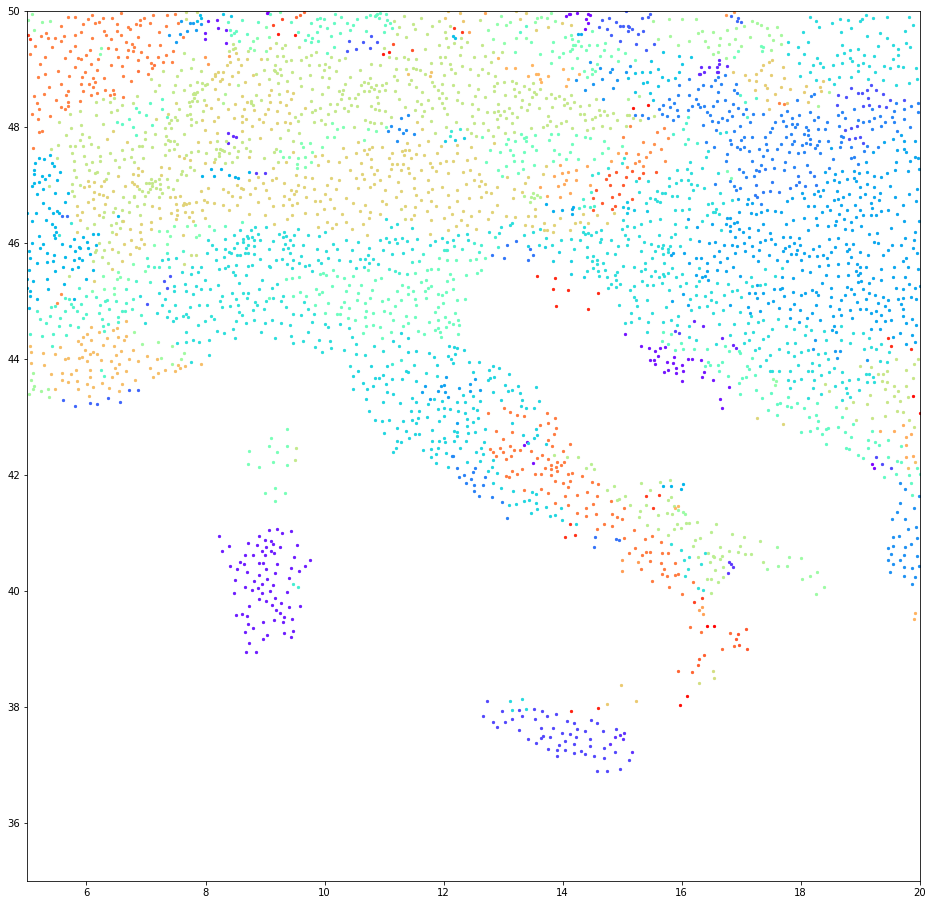

In [14]:
clusters_05_085n = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.85)
print(len(clusters_05_085n))
plot_clusters(clusters_05_085n, figsize=(16,16), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

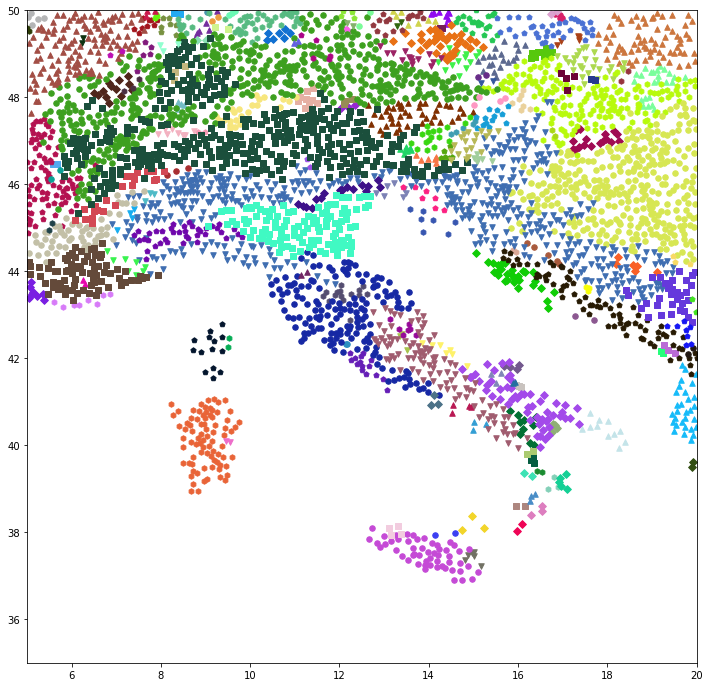

In [34]:
plot_clusters(clusters_05_085n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


4835it [31:34,  2.55it/s]                          


Aggregations computed
305


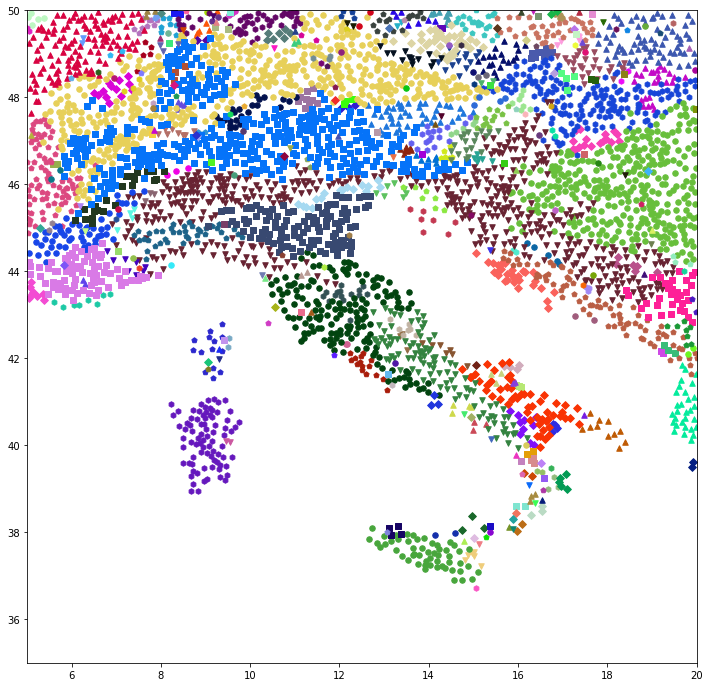

In [42]:
clusters_05_085 = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.85)
print(len(clusters_05_085))
plot_clusters(clusters_05_085, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


 96%|█████████▌| 3928/4089 [31:55<01:18,  2.05it/s]  


Aggregations computed
84


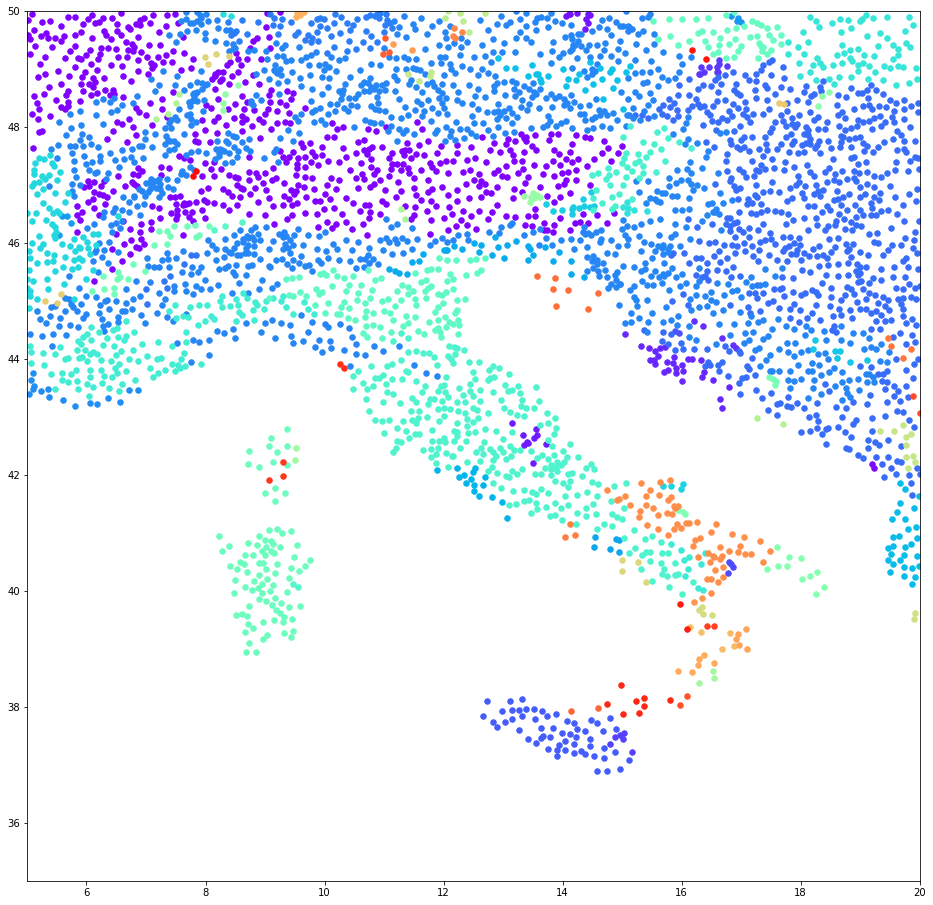

In [16]:
clusters_05_08n = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.8)
print(len(clusters_05_08n))
plot_clusters(clusters_05_08n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

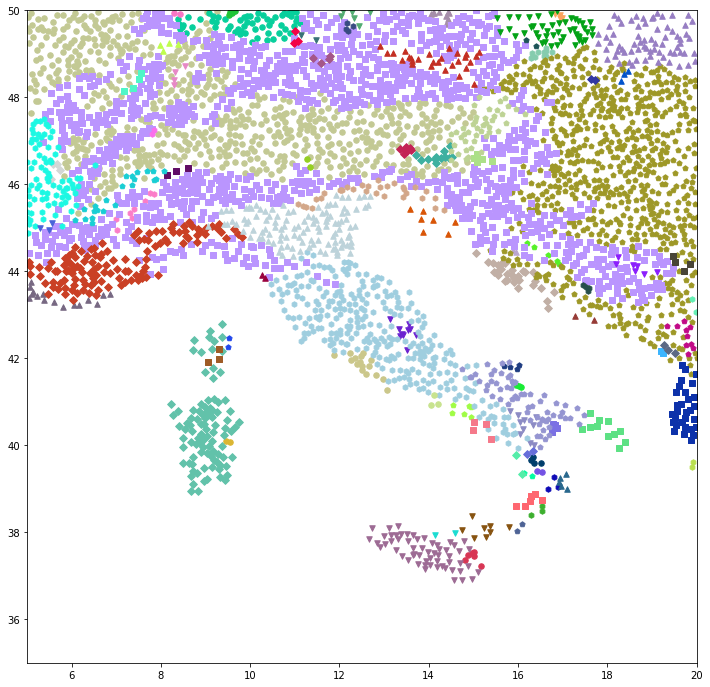

In [38]:
plot_clusters(clusters_05_08n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)

Computing aggregations...


 45%|████▍     | 1828/4089 [16:47<20:45,  1.81it/s]  


Aggregations computed
651


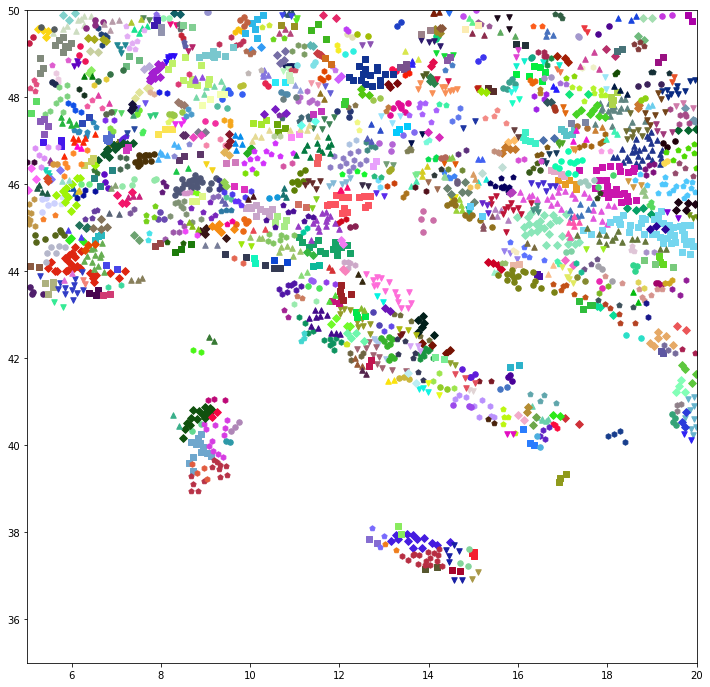

In [40]:
clusters_05_095n = CorrelationClustering(new_df, neighbors_05).compute_clusters(threshold=0.95)
print(len(clusters_05_095n))
plot_clusters(clusters_05_095n, figsize=(12,12), s=30, xmin=5, xmax=20, ymin=35, ymax=50)